In [5]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [6]:
def read_data_files(directory, df = pd.DataFrame()):
    for fn in glob.glob(os.path.join(directory, "*.log")):
        tmp = pd.read_csv(fn, header=0)
        df = df.append(tmp, ignore_index=True)
    return df

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05bc2bf350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f05b7702790>]], dtype=object)

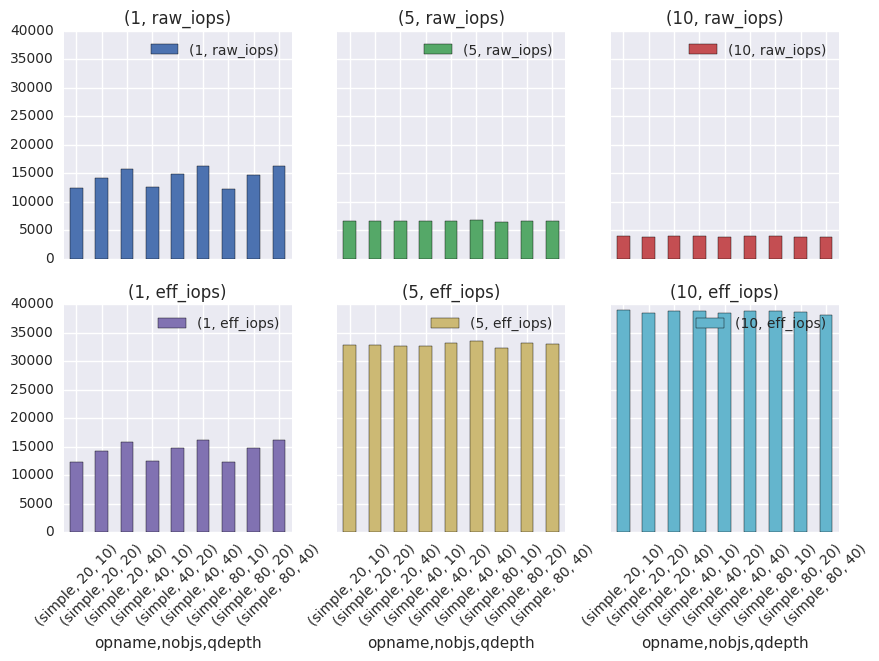

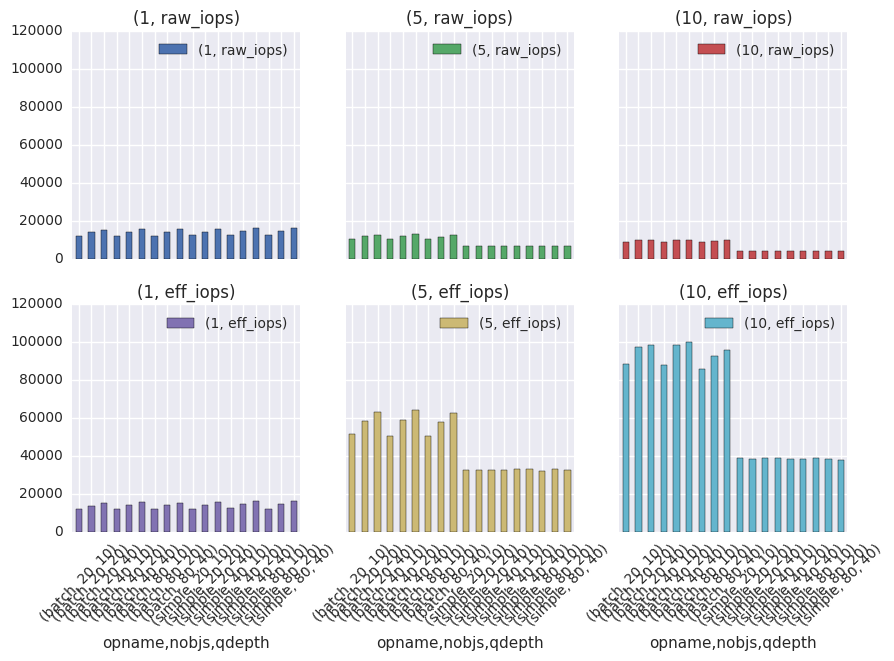

In [7]:
df = read_data_files("expr1")
del df["time"]
del df["esize"]
df["opname"] = df["opname"].map({"zlog_batch_write_simple": "simple",
                                 "zlog_batch_write_batch": "batch"})

x = df[df.opname == "simple"].groupby(["opname", "batchsize", "nobjs", "qdepth"]).mean()
x = x.unstack(level=1).swaplevel(axis=1)
ax = x.plot.bar(subplots=True, layout=(3,3), figsize=(10,10), sharey=True, rot=45)

x = df.groupby(["opname", "batchsize", "nobjs", "qdepth"]).mean()
x = x.unstack(level=1).swaplevel(axis=1)
x.plot.bar(subplots=True, layout=(3,3), figsize=(10,10), sharey=True, rot=45)

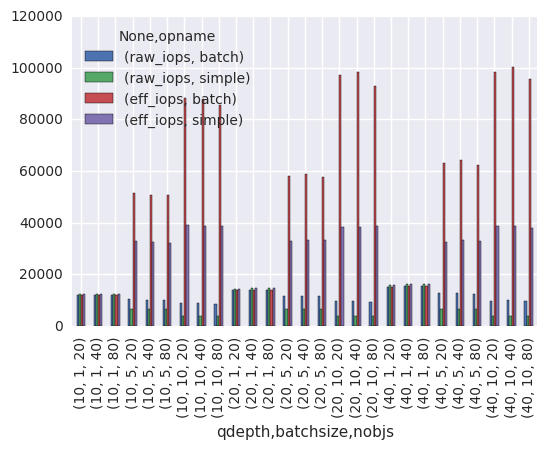

In [9]:
df2 = df.groupby(["opname", "qdepth", "batchsize", "nobjs"]).mean()
#del df2["time"]
#del df2["esize"]
df2.unstack(level=0).plot.bar()

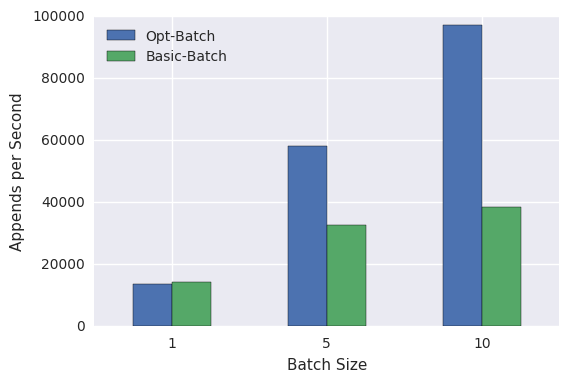

In [18]:
# hot storage graph 1
x = df[(df.opname == "simple") & (df.nobjs == 20) & (df.qdepth == 20)].groupby(["opname", "batchsize", "nobjs", "qdepth"]).mean()
x = df[(df.nobjs == 20) & (df.qdepth == 20)].groupby(["opname", "batchsize", "nobjs", "qdepth"]).mean()
x = x["eff_iops"]
y = x.reset_index()
del y["nobjs"]
del y["qdepth"]
z = y.groupby(["opname", "batchsize"]).mean()
ax = z.unstack(level=0).plot.bar(rot=0)
ax.set_ylabel("Appends per Second")
ax.set_xlabel("Batch Size")
legend_labels = ['Opt-Batch', 'Basic-Batch']
ax.legend(legend_labels, loc='best')
plt.savefig('batching.png', dpi=300, bbox_inches='tight')